In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot
import calendar

C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\WPy64-31050\python-3.10.5.amd64\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
f  = "../data/temixco2021"
df = pd.read_csv(f, index_col=0, parse_dates=True)

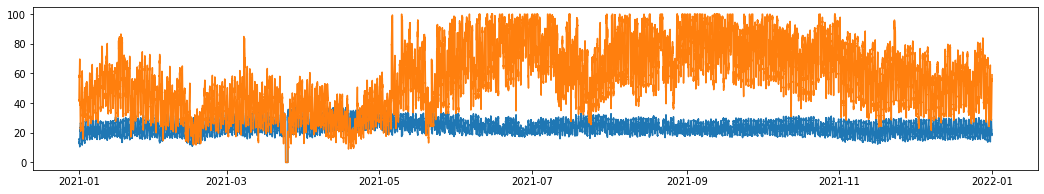

In [3]:
fig, ax = plt.subplots(figsize = (18,3)) 
ax.plot(df.Tamb)
ax.plot(df.Hum)

In [4]:
df.Ig = df.Ig*1/6

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


''

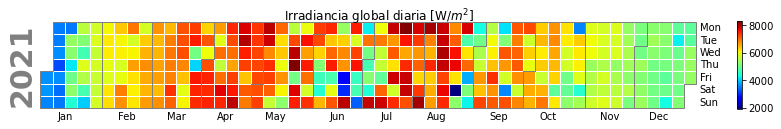

In [5]:
calplot.calplot(df.Ig, cmap = "jet", suptitle="Irradiancia global diaria [W/$m^2$]")
;

''

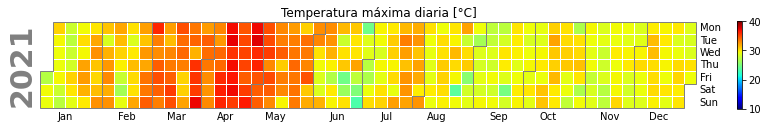

In [6]:
calplot.calplot(df.Tamb, how="max", cmap ="jet", vmin=10, vmax=40, suptitle="Temperatura máxima diaria [°C]")
;

''

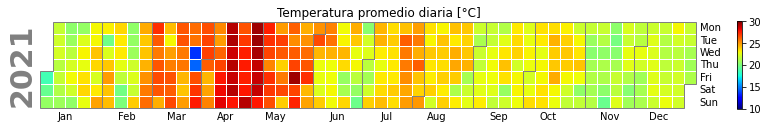

In [7]:
calplot.calplot(df.Tamb, how="mean", cmap ="jet", vmin=10, vmax=30, suptitle="Temperatura promedio diaria [°C]")
;

''

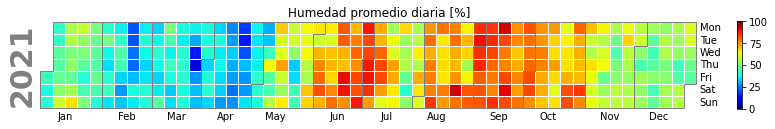

In [8]:
calplot.calplot(df.Hum, how="mean", cmap ="jet", vmin=0, vmax=100, suptitle="Humedad promedio diaria [%]")
;

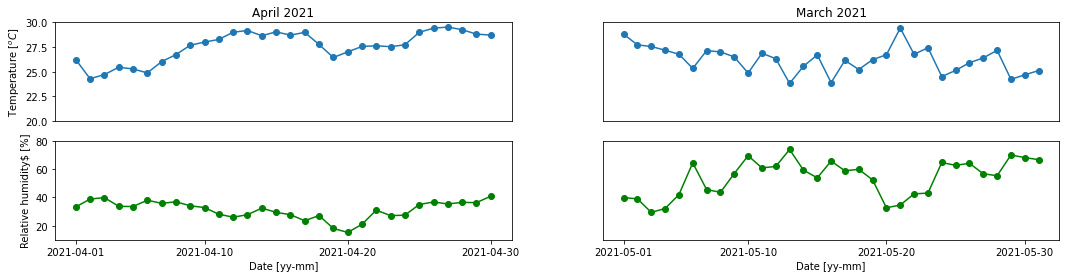

In [14]:
fig, ax = plt.subplots(2,2,figsize = (18,4)) 
ax[0][0].plot(df.Tamb.loc["2021-04"].resample("D").mean(), "o-")
ax[1][0].plot(df.Hum.loc["2021-04"].resample("D").mean(), "o-g")
ax[0][1].plot(df.Tamb.loc["2021-05"].resample("D").mean(), "o-")
ax[1][1].plot(df.Hum.loc["2021-05"].resample("D").mean(), "o-g")


ax[0][0].set_ylabel("Temperature [$^oC$]")
ax[1][0].set_ylabel("Relative humidity$ [%]")

ax[0][0].set_title("April 2021")
ax[0][1].set_title("March 2021")

ax[0][0].set_ylim(20,30)
ax[0][1].set_ylim(20,30)
ax[1][0].set_ylim(10,80)
ax[1][1].set_ylim(10,80)

ax[1][0].set_xlabel("Date [yy-mm]")
ax[1][1].set_xlabel("Date [yy-mm]")

ax[1][0].set_xticks(["2021-04-01", "2021-04-10", "2021-04-20", "2021-04-30"])
ax[0][0].set_xticks([])
ax[1][1].set_xticks(["2021-05-01", "2021-05-10", "2021-05-20", "2021-05-30"])
ax[0][1].set_xticks([])

ax[0][1].set_yticks([])
ax[1][1].set_yticks([])

plt.savefig("../../escrito/figuras/tempVShum")

In [10]:
f    = "../data/temixco2021"
df   = pd.read_csv(f, index_col=0, parse_dates=True)
Tamb = df.Tamb.groupby(by=[df.index.month, df.index.hour]).mean().unstack().T
Hum  = df.Hum.groupby(by=[df.index.month, df.index.hour]).mean().unstack().T
Ig   = df.Ig.groupby(by=[df.index.month, df.index.hour]).mean().unstack().T

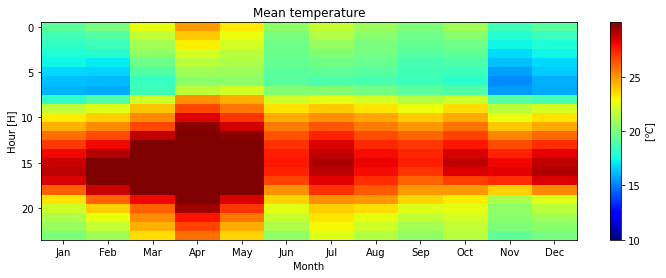

In [15]:
meses = calendar.month_abbr[1:]

fig, ax = plt.subplots(figsize = (12,4))

p = ax.imshow(Tamb, aspect="auto", cmap="jet", vmin=10, vmax=30)

ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)

ax.set_ylabel("Hour [H]")
ax.set_xlabel("Month")

ax.set_title("Mean temperature")


fig.colorbar(p, label="[$^oC$]", ticks=range(5,26,5))

plt.savefig("../../escrito/figuras/Temperature")

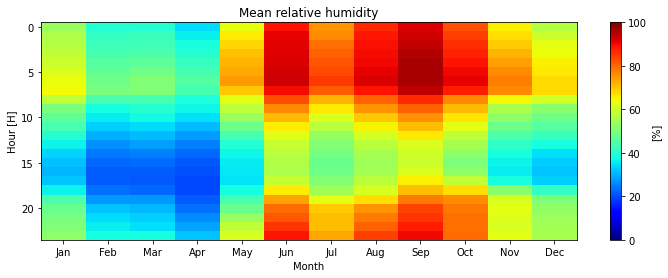

In [16]:
fig, ax = plt.subplots(figsize = (12,4))

p = ax.imshow(Hum, aspect="auto", cmap="jet", vmin=0, vmax=100)

ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)

ax.set_ylabel("Hour [H]")
ax.set_xlabel("Month")


fig.colorbar(p, label="[%]", ticks=range(0,101,20))

ax.set_title("Mean relative humidity")
plt.savefig("../../escrito/figuras/relhum")

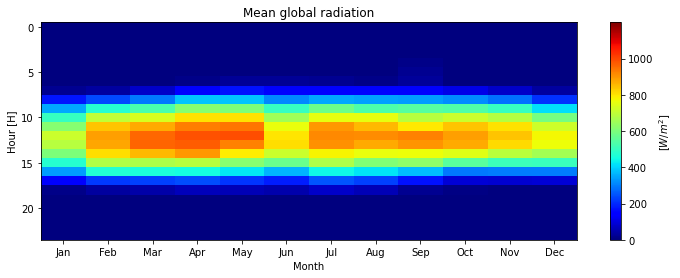

In [17]:
fig, ax = plt.subplots(figsize = (12,4))

p = ax.imshow(Ig, aspect="auto", cmap="jet", vmin=0, vmax=1200)

ax.set_xticks(range(0,12))
ax.set_xticklabels(meses)

ax.set_ylabel("Hour [H]")
ax.set_xlabel("Month")


fig.colorbar(p, label="[$W/m^2$]", ticks=range(0,1101,200))

ax.set_title("Mean global radiation")
plt.savefig("../../escrito/figuras/Ig")